In [1]:
#Buscamos informacion sobre el Total Amount por oportunidad y territorio, para los casos exitosos.
#Para esto calcularemos el Total Amount por oportunidad y nos quedaremos unicamente con las oportunidades ganadas.
#Buscaremos ver estadisticas de los Total Amount de oportunidad por territorio, tales como la media, cuantiles y variacion. 

#Cargo un csv ya limpio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

data = pd.read_csv("Entrenamieto_ECI_2020_Total_Amount.csv")
#Elimino Nones y me quedo solo con los casos ganados
columns = ['Opportunity_ID', 'Territory', 'Total_Amount(USD)']
gp = data.loc[(data.Territory != 'None') & (data.Stage == 'Closed Won'), columns]
gp

,Opportunity_ID,Territory,Total_Amount(USD)
2,2,NW America,8.386560e+04
7,7,NW America,5.068800e+04
23,11,India,1.621851e+06
63,20,Germany,1.168986e+05
64,21,NW America,3.184974e+06
...,...,...,...
16577,12797,Germany,4.675955e+05
16579,12799,Norway,4.543578e+05
16582,12801,Austria,1.168988e+05
16583,12801,Austria,1.052089e+05


In [2]:
#Sumo los Total Amount de un mismo product_id
opp_total_amount = gp.groupby(['Territory', 'Opportunity_ID']).sum().reset_index()
opp_total_amount

,Territory,Opportunity_ID,Total_Amount(USD)
0,Australia,271,83215.72
1,Australia,272,83215.72
2,Australia,273,83215.72
3,Australia,274,83215.72
4,Australia,275,74893.56
...,...,...,...
4041,Vietnam,8193,53995.50
4042,Vietnam,8867,15165.00
4043,Vietnam,8972,14298.75
4044,Vietnam,9026,12780.00


In [3]:
#Calculo media por territorio y evito errores debido a la "Ecuacion mas peligrosa de la historia"
group_mean = gp.groupby('Territory')['Total_Amount(USD)'].count().mean()
gp = gp.groupby('Territory').filter(lambda x: len(x) >= group_mean)[['Opportunity_ID', 'Territory', 'Total_Amount(USD)']]
gp = gp.groupby(['Territory', 'Opportunity_ID']).agg({'Total_Amount(USD)' : 'sum'}).reset_index()
gp = gp.groupby('Territory').agg({'Total_Amount(USD)' : 'mean'}).reset_index().sort_values('Total_Amount(USD)')
gp

,Territory,Total_Amount(USD)
2,China (PRC),61798.661333
12,Singapore,68453.717897
7,Japan,112606.021515
13,Spain,131200.342496
6,Italy,135307.489453
1,Belgium,143301.126219
0,Australia,164848.699052
5,India,289050.415581
3,France,322235.021410
10,Netherlands,375940.516516


In [4]:
total_amount_mean_by_territories = opp_total_amount.groupby('Territory')\
                                  .agg({'Total_Amount(USD)' : ['mean', 'count']})\
                                  .reset_index()
total_amount_mean_by_territories.columns = ['Territory', 'Opportunity_Total_Amount_mean', 'Number_of_occurrences']

columns = ['Territory','Opportunity_Total_Amount_mean']

total_amount_mean_by_territories = total_amount_mean_by_territories\
                                   .loc[total_amount_mean_by_territories.Number_of_occurrences > 30, columns]\
                                   .sort_values('Opportunity_Total_Amount_mean')
total_amount_mean_by_territories

,Territory,Opportunity_Total_Amount_mean
8,China (PRC),61798.661333
37,Singapore,68453.717897
17,Indonesia,80318.849000
19,Japan,112606.021515
41,Spain,131200.342496
18,Italy,135307.489453
22,Luxembourg,140328.688824
2,Belgium,143301.126219
1,Austria,154103.394848
0,Australia,164848.699052


Text(0, 0.5, 'Opportunity Total Amount(USD)')

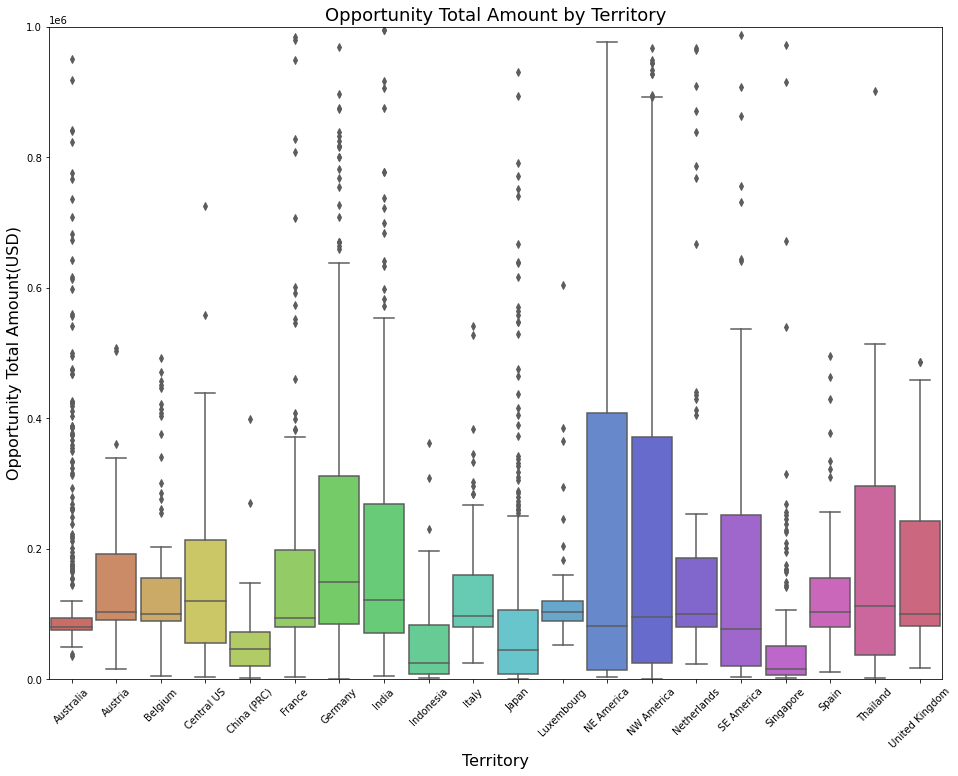

In [5]:
# No es buena idea hacer un boxplot, los valores se encuentran muy dispersos y el grafico queda comprimido
# Sino habria que filtrar algunos valores, pero no sabria que criterio tomar y si seria correcto.


opp_total_amount = opp_total_amount.groupby('Territory')\
                                   .filter(lambda x: (x['Total_Amount(USD)'].count() > 30))

plt.figure(figsize=(16, 12))
plt.ylim(0, 1e6)
plt.xticks(rotation=45)

g = sns.boxplot(x="Territory", y="Total_Amount(USD)", 
                     data=opp_total_amount, palette="hls", orient='v', width=0.9)
g.set_title("Opportunity Total Amount by Territory", fontsize=18)
g.set_xlabel("Territory", fontsize=16)
g.set_ylabel("Opportunity Total Amount(USD)", fontsize=16)


In [6]:
#Del grafico se aprecia que algunos valores maximos se encuentran muy distantes del grueso de la distribucion de precios, por ejemplo para el caso de NE America, NW America y Germany.

# Podemos realizar un zoom cortando los valores maximos para apreciar mejor el grueso de la distribucion de precios

Text(0, 0.5, 'Opportunity Total Amount(USD)')

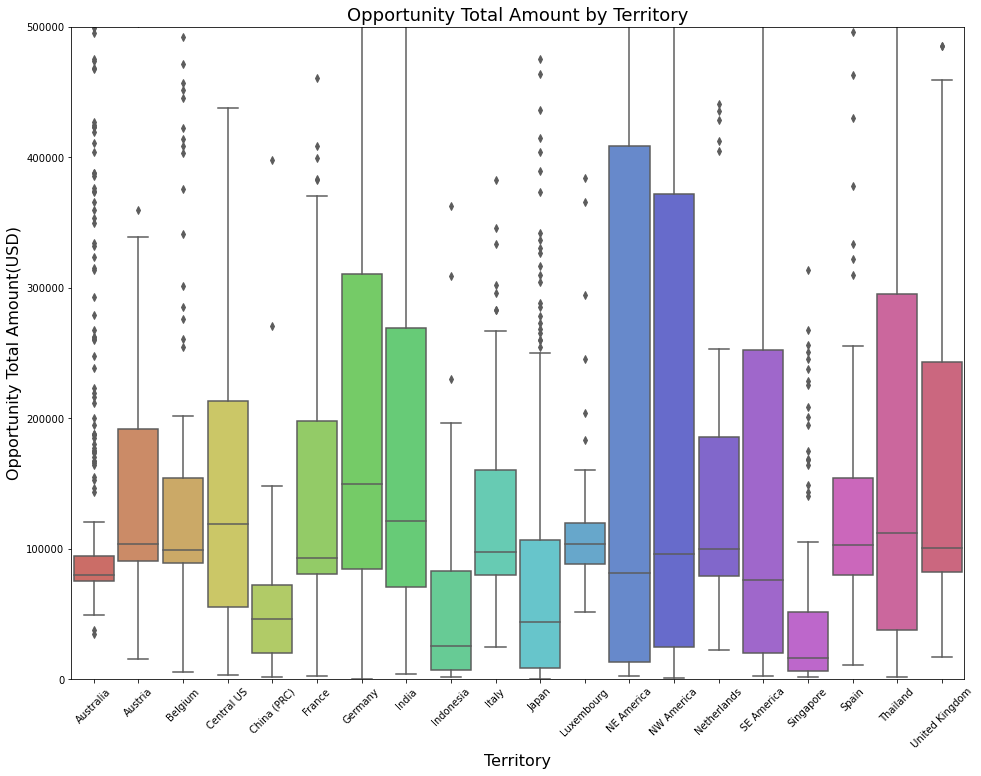

In [7]:
plt.figure(figsize=(16, 12))
plt.ylim(0, 0.5e6)
plt.xticks(rotation=45)

g = sns.boxplot(x="Territory", y="Total_Amount(USD)", 
                     data=opp_total_amount, palette="hls", orient='v', width=0.9)
g.set_title("Opportunity Total Amount by Territory", fontsize=18)
g.set_xlabel("Territory", fontsize=16)
g.set_ylabel("Opportunity Total Amount(USD)", fontsize=16)

In [8]:
# De este ultimo grafico se aprecia con mas claridad la distribucion de precios por territorio.
# Se puede destacar que en la mayoria de los territorios la mediana se encuentra cerca del primer cuantil.
# Notamos ademas que NE America y NW America la distribucion de precios es muy amplia, de lo que se puede concluir que una oportunidad tiene alta probabilidad de exito en un rango de precios mas amplio.

In [9]:
territories = total_amount_mean_by_territories['Territory'].values.tolist()
territories

['China (PRC)',
 'Singapore',
 'Indonesia',
 'Japan',
 'Spain',
 'Italy',
 'Luxembourg',
 'Belgium',
 'Austria',
 'Australia',
 'Thailand',
 'India',
 'France',
 'Netherlands',
 'Central US',
 'Germany',
 'NE America',
 'NW America',
 'United Kingdom',
 'SE America']

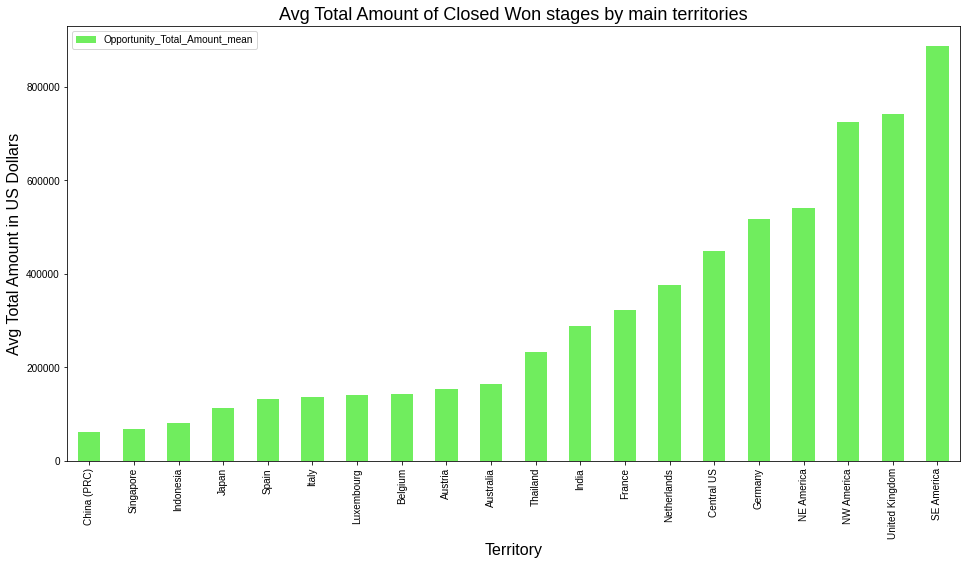

In [10]:
total_amount_mean_by_territories[['Opportunity_Total_Amount_mean']].plot(kind="bar", figsize=(16, 8), color=(0.2,0.9,0.1,0.7))
style.use("seaborn")
plt.title("Avg Total Amount of Closed Won stages by main territories", fontdict={'size' : 18})
plt.xlabel("Territory", fontdict={'size' : 16})
plt.ylabel("Avg Total Amount in US Dollars", fontdict={'size' : 16})
plt.xticks(np.arange(len(territories)), territories)
plt.show()

In [11]:
# En este grafico podemos apreciar la media de precio de oportunidad por territorio, algo que no quedaba claro en el boxplot anterior, ahora uno podria hacerse la pregunta de como cambia la probabilidad de exito segun las desviaciones de la media de precio.


#VER SI HACER ALGUN GRAFICO MAS QUE RELACIONE TOTAL AMOUNT CON TERRITORIO.